In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [59]:
url = 'https://gist.githubusercontent.com/aladin002dz/856318365ec11185fc755adc1568e47f/raw/f7d61a8605b9a2dcd0696086e133d474a8acfe63/real-gdp-growth'
df = pd.read_csv(url, usecols=['Country', 'Year', 'Value'])
df.head(3)

,Country,Year,Value
0,Albania,1980,2.7
1,Albania,1981,5.7
2,Albania,1982,2.9


In [60]:
'''
colors = dict(zip(
    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa"],
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]
))

group_lk = df.set_index('Country')['ِCountry'].to_dict()
'''

'\ncolors = dict(zip(\n    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa"],\n    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]\n))\n\ngroup_lk = df.set_index(\'Country\')[\'ِCountry\'].to_dict()\n'

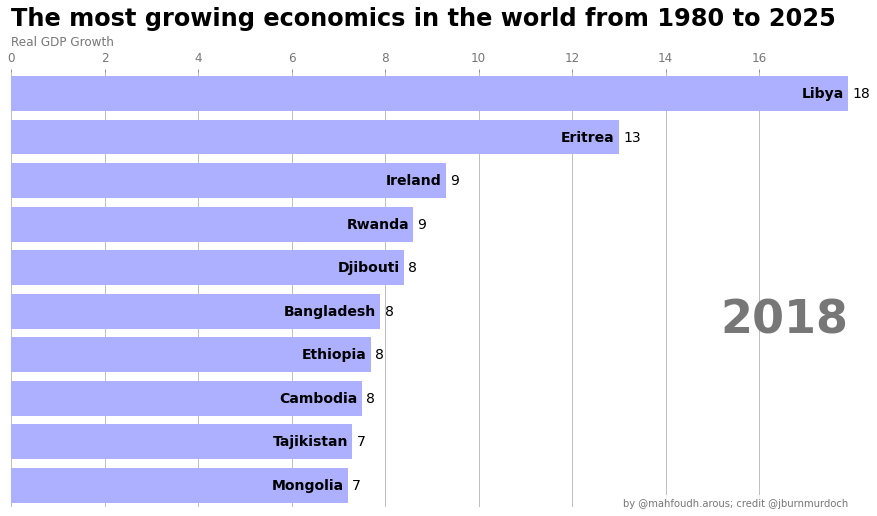

In [61]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df[df['Year'].eq(current_year)].sort_values(by='Value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['Value'], color="#adb0ff")
    dx = dff['Value'].max(skipna = True)  / 200
    for i, (value, Country) in enumerate(zip(dff['Value'], dff['Country'])):
        ax.text(value-dx, i,     Country,           size=14, weight=600, ha='right', va='center')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Real GDP Growth', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most growing economics in the world from 1980 to 2025',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @mahfoudh.arous; credit @jburnmurdoch', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

draw_barchart(2018)

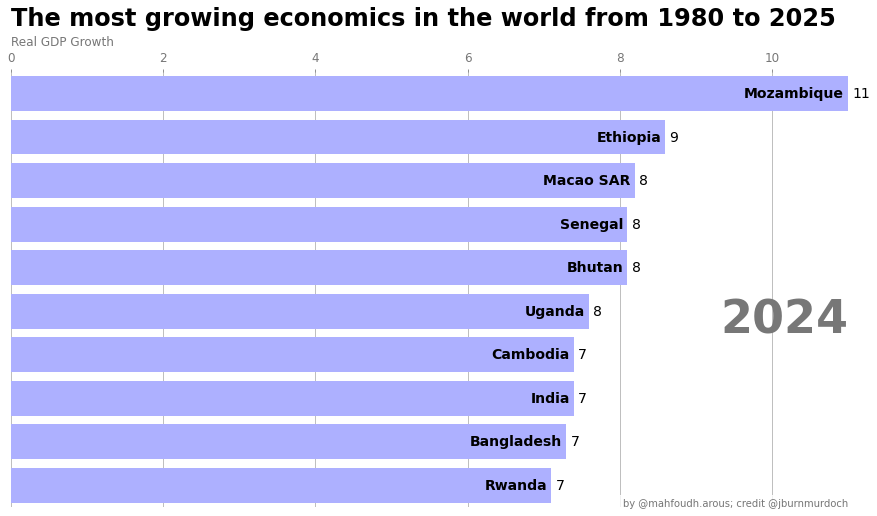

In [62]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1980, 2025))
#HTML(animator.to_jshtml())
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Mahfoudh Arous'), bitrate=100000000)
#animator.save('C:/Users/aladin002dz/Desktop/chart-race/im37.mp4', writer=writer, dpi=300)
#HTML(animator.to_html5_video())
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()